### IMPORTATION DU DATASET

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_df = 'https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1'
req_df = requests.get(url_df)
data_df = StringIO(req_df.text)
df_2023 = pd.read_csv(data_df, sep='|')

df_2023

C:\Users\am91r\AppData\Local\Temp\ipykernel_2488\1713273855.py:4: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(data_df, sep='|')


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,2.0,Appartement,NaN,233.0,8.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,64.0,3.0,S,NaN,988.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/10/2023,Adjudication,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
3727001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/10/2023,Adjudication,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
3727002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/10/2023,Adjudication,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
3727003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28/12/2023,Vente,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN


### EXPLORATORY DATA ANALYSIS (EDA)

Valeur fonciere bins
0-100k        0.359823
100k-200k     0.256400
200k-300k     0.169587
300k-400k     0.088741
400k-500k     0.047541
500k-600k     0.027661
600k-1100k    0.050248
Name: proportion, dtype: float64


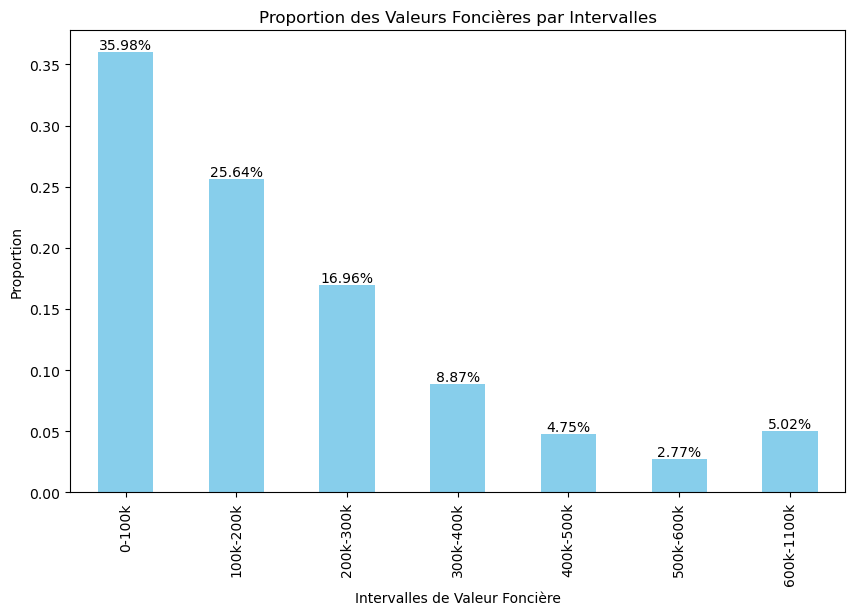

In [3]:
#Segmentation des valeurs foncières en fourchettes pour la visualisation
df_2023['Valeur fonciere'] = df_2023['Valeur fonciere'].str.replace(',', '.')
df_2023['Valeur fonciere'] = df_2023['Valeur fonciere'].astype(float)

bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 1100000]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-1100k']

df_2023['Valeur fonciere bins'] = pd.cut(df_2023['Valeur fonciere'], bins=bins, labels=labels, right=False)

proportions = df_2023['Valeur fonciere bins'].value_counts(normalize=True).sort_index()
print(proportions)


plt.figure(figsize=(10, 6))
proportions.plot(kind='bar', color='skyblue')
plt.xlabel('Intervalles de Valeur Foncière')
plt.ylabel('Proportion')
plt.title('Proportion des Valeurs Foncières par Intervalles')
for index, value in enumerate(proportions):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
plt.show()

df_2023 = df_2023.drop('Valeur fonciere bins',axis=1)

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


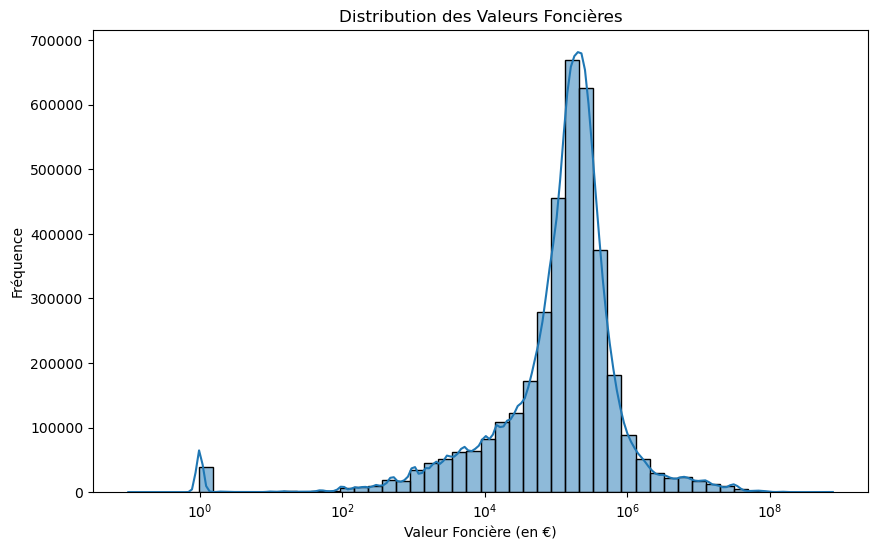

In [4]:
print(df_2023.columns)

# Distribution des valeurs foncières
plt.figure(figsize=(10, 6))
sns.histplot(df_2023['Valeur fonciere'], bins=50, kde=True, log_scale=True)
plt.title('Distribution des Valeurs Foncières')
plt.xlabel('Valeur Foncière (en €)')
plt.ylabel('Fréquence')
plt.show()

C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


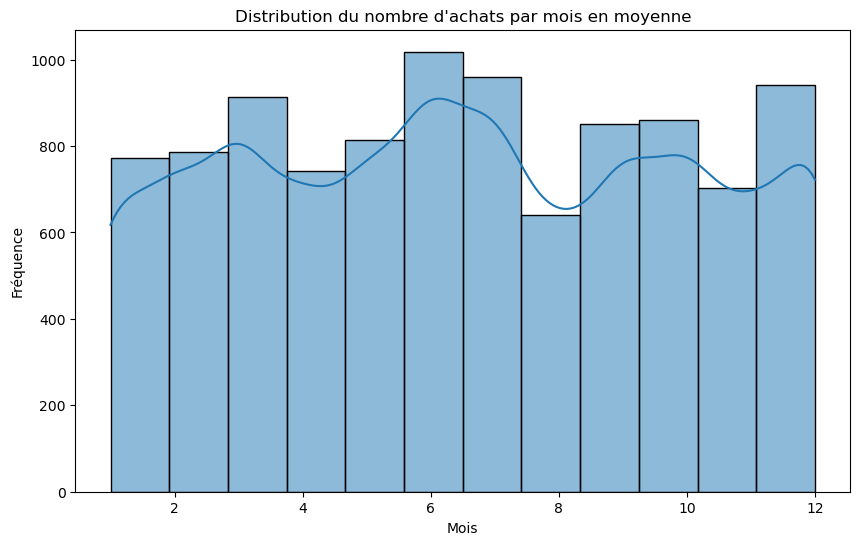

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df_2023['Date mutation affichage'] = pd.to_datetime(df_2023['Date mutation'], format='%d/%m/%Y')
df_2023['Month'] = df_2023['Date mutation affichage'].dt.month

# Distribution du nombre d'achats par mois en moyenne
data_sample = df_2023.sample(10000)
plt.figure(figsize=(10, 6))
sns.histplot(data_sample['Month'], bins=12, kde=True)
plt.title('Distribution du nombre d\'achats par mois en moyenne')
plt.xlabel('Mois')
plt.ylabel('Fréquence')
plt.show()

df_2023.drop('Date mutation affichage', axis=1,inplace=True)
df_2023.drop('Month', axis=1,inplace=True)

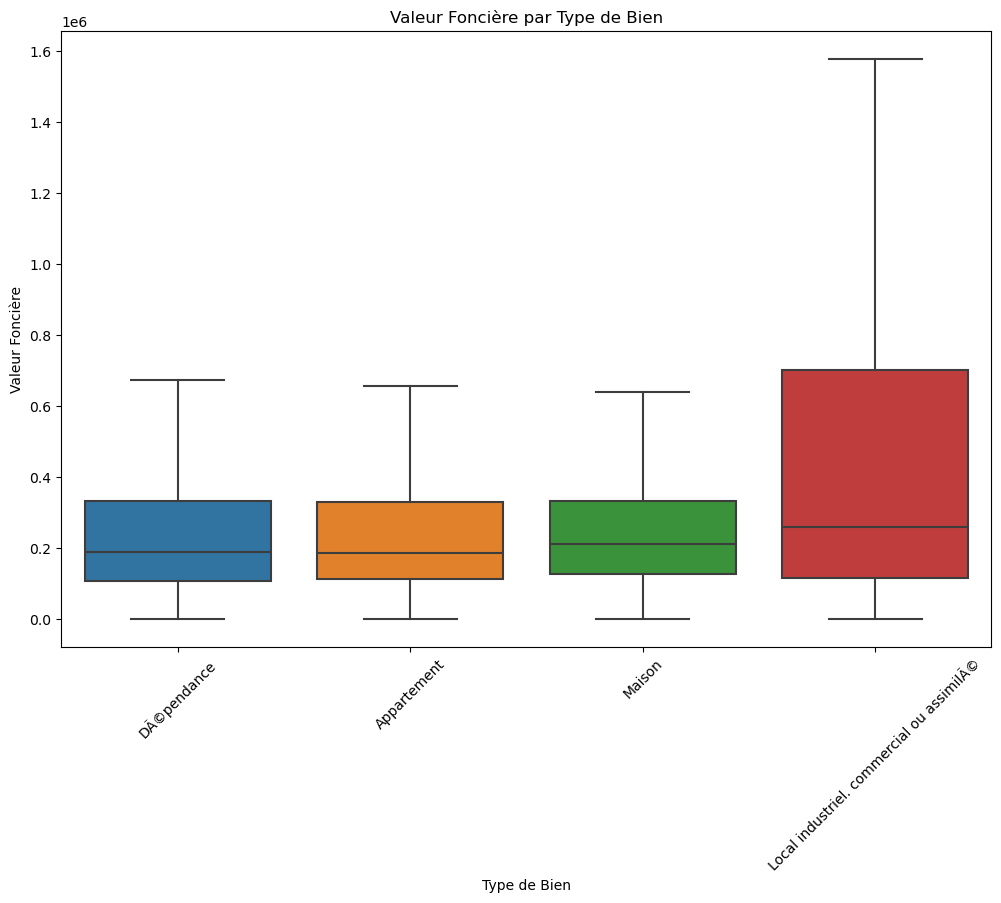

In [6]:
# Boxplot de la valeur foncière par type de bien
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type local', y='Valeur fonciere', data=df_2023, showfliers=False)
plt.title('Valeur Foncière par Type de Bien')
plt.xlabel('Type de Bien')
plt.ylabel('Valeur Foncière')
plt.xticks(rotation=45)
plt.show()

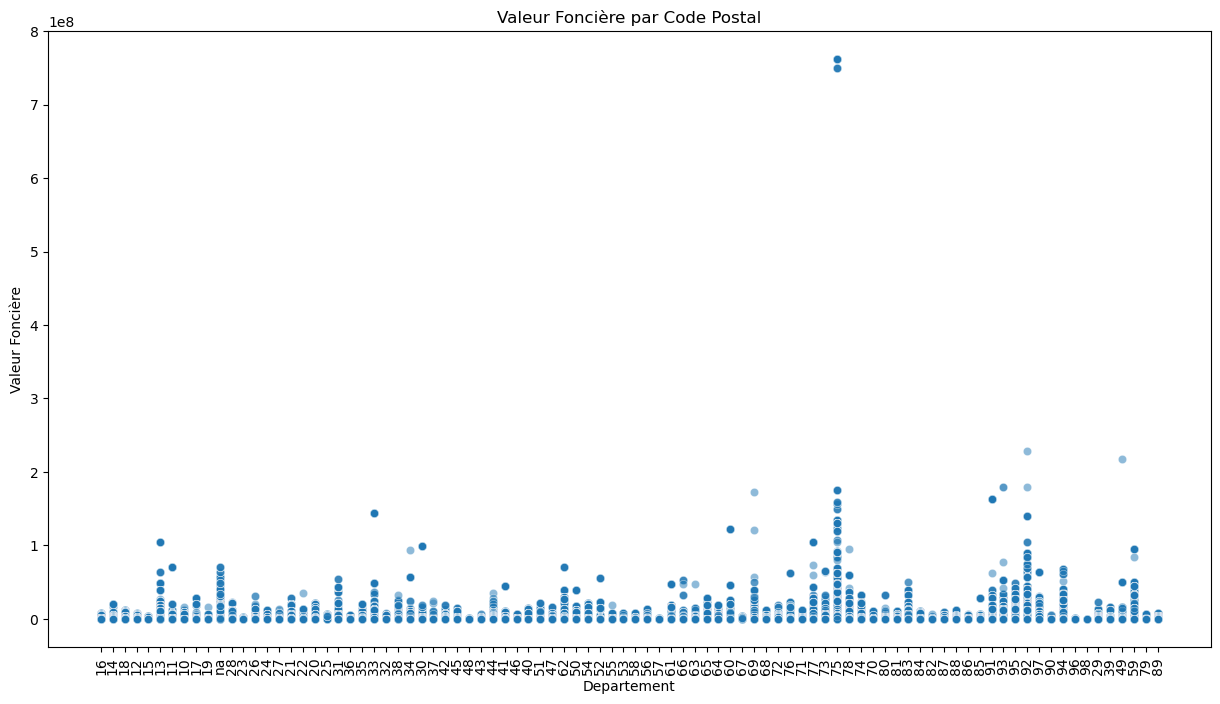

In [8]:

df_2023['Departement'] = df_2023['Code postal'].astype(str).str[:2]

plt.figure(figsize=(15, 8))

sns.scatterplot(x='Departement', y='Valeur fonciere', data=df_2023, alpha=0.5)

plt.title('Valeur Foncière par Code Postal')
plt.xlabel('Departement')
plt.ylabel('Valeur Foncière')

plt.xticks(rotation=90)

plt.show()


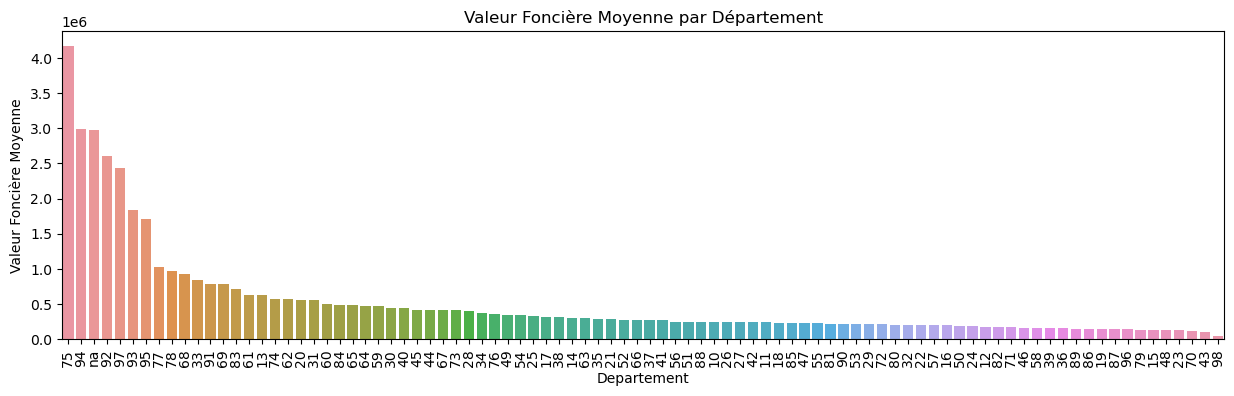

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,2.0,Appartement,NaN,233.0,8.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,64.0,3.0,S,NaN,988.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/10/2023,Adjudication,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
3727001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/10/2023,Adjudication,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
3727002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/10/2023,Adjudication,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN
3727003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28/12/2023,Vente,...,NaN,1,3.0,DÃ©pendance,NaN,0.0,0.0,NaN,NaN,NaN


In [9]:
plt.figure(figsize=(15, 4))
sns.barplot(x='Departement', y='Valeur fonciere', data=df_2023.groupby('Departement')['Valeur fonciere'].mean().reset_index().sort_values(by='Valeur fonciere', ascending=False))
plt.title('Valeur Foncière Moyenne par Département')
plt.xlabel('Departement')
plt.ylabel('Valeur Foncière Moyenne')
plt.xticks(rotation=90)
plt.show()

df_2023 = df_2023.drop('Departement',axis=1)
df_2023

### PREPROCESSING

In [10]:
#vérification du taux de valeurs nulles par colonne
df_2023.isna().mean().sort_values(ascending = False)

Identifiant de document       1.000000
4 Articles CGI                1.000000
Reference document            1.000000
5 Articles CGI                1.000000
Identifiant local             1.000000
3 Articles CGI                1.000000
2 Articles CGI                1.000000
1 Articles CGI                1.000000
Surface Carrez du 5eme lot    0.999753
Surface Carrez du 4eme lot    0.999241
No Volume                     0.997782
5eme lot                      0.997734
Surface Carrez du 3eme lot    0.996734
4eme lot                      0.994640
3eme lot                      0.982823
Surface Carrez du 2eme lot    0.970846
B/T/Q                         0.955790
Nature culture speciale       0.955481
Prefixe de section            0.953797
Surface Carrez du 1er lot     0.911431
2eme lot                      0.903426
1er lot                       0.691092
Surface reelle bati           0.425794
Nombre pieces principales     0.425794
Type local                    0.425131
Code type local          

In [11]:
surfacescarres = [
    'Surface Carrez du 1er lot',
    'Surface Carrez du 2eme lot',
    'Surface Carrez du 3eme lot',
    'Surface Carrez du 4eme lot',
    'Surface Carrez du 5eme lot'
]

# si on a pas de surface carré on met un 0
df_2023.loc[:, surfacescarres] = df_2023.loc[:,surfacescarres].fillna(0)
df_2023[surfacescarres] = df_2023[surfacescarres].replace(',', '.', regex=True).astype(float)

df_2023['Surface Carrez Totale'] = df_2023[surfacescarres].sum(axis=1)
df_2023 = df_2023.drop(columns=surfacescarres)

col_meanNA = df_2023.isna().mean()

#suppression des colonnes avec + de 70% de NaN
df_cleaned_2023 = df_2023.loc[:, col_meanNA < 0.7]

df_cleaned_2023.loc[:,"Surface terrain"] = df_cleaned_2023.loc[:,"Surface terrain"].fillna(df_cleaned_2023["Surface reelle bati"])

df_cleaned_2023 = df_cleaned_2023.apply(lambda col: col.fillna(0) if col.dtype in [np.float64, np.int64] else col.fillna('0'))

df_cleaned_2023 = df_cleaned_2023.drop_duplicates()

#df_cleaned_2023['Valeur fonciere'] = df_cleaned_2023['Valeur fonciere'].str.replace(',', '.')
#df_cleaned_2023['Valeur fonciere'] = df_cleaned_2023['Valeur fonciere'].astype(float)

df_cleaned_2023.loc[df_cleaned_2023['Code departement'] == '2A', 'Code departement'] = 200
df_cleaned_2023.loc[df_cleaned_2023['Code departement'] == '2B', 'Code departement'] = 201

df_cleaned_2023['Date mutation'] = pd.to_datetime(df_cleaned_2023['Date mutation'], format='%d/%m/%Y')

df_cleaned_2023

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Surface Carrez Totale
0,1,2023-01-05,Vente,1070000.0,184.0,ALL,0124,DES HETRES,1630.0,ST-GENIS-POUILLY,...,334,29,1,3.0,DÃ©pendance,0.0,0.0,0,0.0,0.0
1,1,2023-01-05,Vente,1070000.0,159.0,ALL,0124,DES HETRES,1630.0,ST-GENIS-POUILLY,...,336,8,1,3.0,DÃ©pendance,0.0,0.0,0,0.0,0.0
2,1,2023-01-05,Vente,1070000.0,159.0,ALL,0124,DES HETRES,1630.0,ST-GENIS-POUILLY,...,336,22,1,2.0,Appartement,233.0,8.0,0,233.0,0.0
3,1,2023-01-03,Vente,152200.0,2914.0,RTE,0107,DE PONCIN,1450.0,SERRIERES-SUR-AIN,...,2317,0,0,1.0,Maison,64.0,3.0,S,988.0,0.0
4,1,2023-01-05,Vente,269000.0,427.0,CHE,0040,DE L'AUBEPIN,1800.0,SAINT-JEAN-DE-NIOST,...,2405,0,0,1.0,Maison,73.0,3.0,S,835.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,1,2023-10-05,Adjudication,3931000.0,39.0,AV,1832.0,CHARLES FLOQUET,75007.0,PARIS 07,...,4,17,1,3.0,DÃ©pendance,0.0,0.0,0,0.0,0.0
3727001,1,2023-10-05,Adjudication,3931000.0,39.0,AV,1832.0,CHARLES FLOQUET,75007.0,PARIS 07,...,4,20,1,3.0,DÃ©pendance,0.0,0.0,0,0.0,0.0
3727002,1,2023-10-05,Adjudication,3931000.0,39.0,AV,1832.0,CHARLES FLOQUET,75007.0,PARIS 07,...,4,10,1,3.0,DÃ©pendance,0.0,0.0,0,0.0,0.0
3727003,1,2023-12-28,Vente,98250.0,66.0,RUE,8892.0,SEBASTIEN MERCIER,75015.0,PARIS 15,...,100,26,1,3.0,DÃ©pendance,0.0,0.0,0,0.0,0.0


--------------------------------------------------------------------------------------------------------------------------------

In [12]:
df_cleaned_2023["Commune"] = df_cleaned_2023["Commune"].str.replace('-',' ')
df_cleaned_2023["Commune"] = df_cleaned_2023["Commune"].str.replace('SAINT','ST')
df_cleaned_2023["Commune"]

df_cleaned_2023.dropna(subset=["Valeur fonciere","Surface reelle bati"], inplace = True)
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Surface reelle bati']>0]

#on s'assure que toutes les lignes ont une valeur foncière
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Valeur fonciere']>0]

#ajout de la colonne prix au m²
df_cleaned_2023["Prix au m²"] = df_cleaned_2023["Valeur fonciere"] / df_cleaned_2023["Surface reelle bati"]

In [13]:
#copy pour pouvoir visualiser nos données
df_2023_visu = df_cleaned_2023.copy()

df_cleaned_2023= df_cleaned_2023.drop(columns = ["No disposition", "No voie", "Type de voie", "Code voie", "Voie", "Commune","Nature culture", "1er lot"])

df_cleaned_2023

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²
2,2023-01-05,Vente,1070000.0,1630.0,1,354,BD,336,1,2.0,Appartement,233.0,8.0,233.0,0.0,4592.274678
3,2023-01-03,Vente,152200.0,1450.0,1,404,D,2317,0,1.0,Maison,64.0,3.0,988.0,0.0,2378.125000
4,2023-01-05,Vente,269000.0,1800.0,1,361,B,2405,0,1.0,Maison,73.0,3.0,835.0,0.0,3684.931507
7,2023-01-03,Vente,770000.0,1210.0,1,281,AD,41,0,1.0,Maison,136.0,7.0,921.0,0.0,5661.764706
14,2023-01-06,Vente,85520.0,1340.0,1,24,AI,127,0,1.0,Maison,160.0,5.0,160.0,0.0,534.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726993,2023-03-02,Adjudication,145000.0,75016.0,75,116,FK,122,2,2.0,Appartement,18.0,2.0,18.0,0.0,8055.555556
3726994,2023-02-16,Adjudication,212000.0,75015.0,75,115,AK,1,1,2.0,Appartement,26.0,1.0,26.0,0.0,8153.846154
3726995,2023-02-16,Adjudication,144000.0,75015.0,75,115,AK,1,1,2.0,Appartement,15.0,1.0,15.0,0.0,9600.000000
3726998,2023-10-05,Adjudication,3931000.0,75007.0,75,107,BU,4,3,2.0,Appartement,206.0,6.0,206.0,0.0,19082.524272


### ENCODAGE

In [14]:
reference_date = pd.Timestamp("2023-01-01")
# conversion de la date en nombre de jours écoulés depuis la date de référence
df_cleaned_2023['Date_numeric'] = (df_cleaned_2023['Date mutation'] - reference_date) // pd.Timedelta('1D')
df_cleaned_2023.drop('Date mutation', axis=1, inplace=True)

#on remaplce chaque nature de mutation par sa fréquence
frequency_nature_mutation = df_cleaned_2023['Nature mutation'].value_counts(normalize=True)
df_cleaned_2023['nature_mutation_encoded'] = df_cleaned_2023['Nature mutation'].map(frequency_nature_mutation)

df_cleaned_2023 = df_cleaned_2023.drop(columns=["Nature mutation","Type local"])


df_cleaned_2023['Code departement'] = df_cleaned_2023['Code departement'].astype(float)


df_cleaned_2023.dtypes

Valeur fonciere              float64
Code postal                  float64
Code departement             float64
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Surface reelle bati          float64
Nombre pieces principales    float64
Surface terrain              float64
Surface Carrez Totale        float64
Prix au m²                   float64
Date_numeric                   int64
nature_mutation_encoded      float64
dtype: object

In [15]:
#on crée l'encodeur et on encode ce quo doit être encodé
le = LabelEncoder()
df_cleaned_2023["Section"] = le.fit_transform(df_cleaned_2023["Section"])
df_cleaned_2023["Section"] = df_cleaned_2023["Section"].astype(float)
df_cleaned_2023 = df_cleaned_2023.drop_duplicates()
df_cleaned_2023

#TOUTES LES VALEURS SONT MAINTENANT NUMERIQUES

,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²,Date_numeric,nature_mutation_encoded
2,1070000.0,1630.0,1.0,354,32.0,336,1,2.0,233.0,8.0,233.0,0.0,4592.274678,4,0.991240
3,152200.0,1450.0,1.0,404,82.0,2317,0,1.0,64.0,3.0,988.0,0.0,2378.125000,2,0.991240
4,269000.0,1800.0,1.0,361,28.0,2405,0,1.0,73.0,3.0,835.0,0.0,3684.931507,4,0.991240
7,770000.0,1210.0,1.0,281,5.0,41,0,1.0,136.0,7.0,921.0,0.0,5661.764706,2,0.991240
14,85520.0,1340.0,1.0,24,10.0,127,0,1.0,160.0,5.0,160.0,0.0,534.500000,5,0.991240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726993,145000.0,75016.0,75.0,116,147.0,122,2,2.0,18.0,2.0,18.0,0.0,8055.555556,60,0.002138
3726994,212000.0,75015.0,75.0,115,12.0,1,1,2.0,26.0,1.0,26.0,0.0,8153.846154,46,0.002138
3726995,144000.0,75015.0,75.0,115,12.0,1,1,2.0,15.0,1.0,15.0,0.0,9600.000000,46,0.002138
3726998,3931000.0,75007.0,75.0,107,49.0,4,3,2.0,206.0,6.0,206.0,0.0,19082.524272,277,0.002138


### DISPERSION DES DIFFERENTES VARIABLES

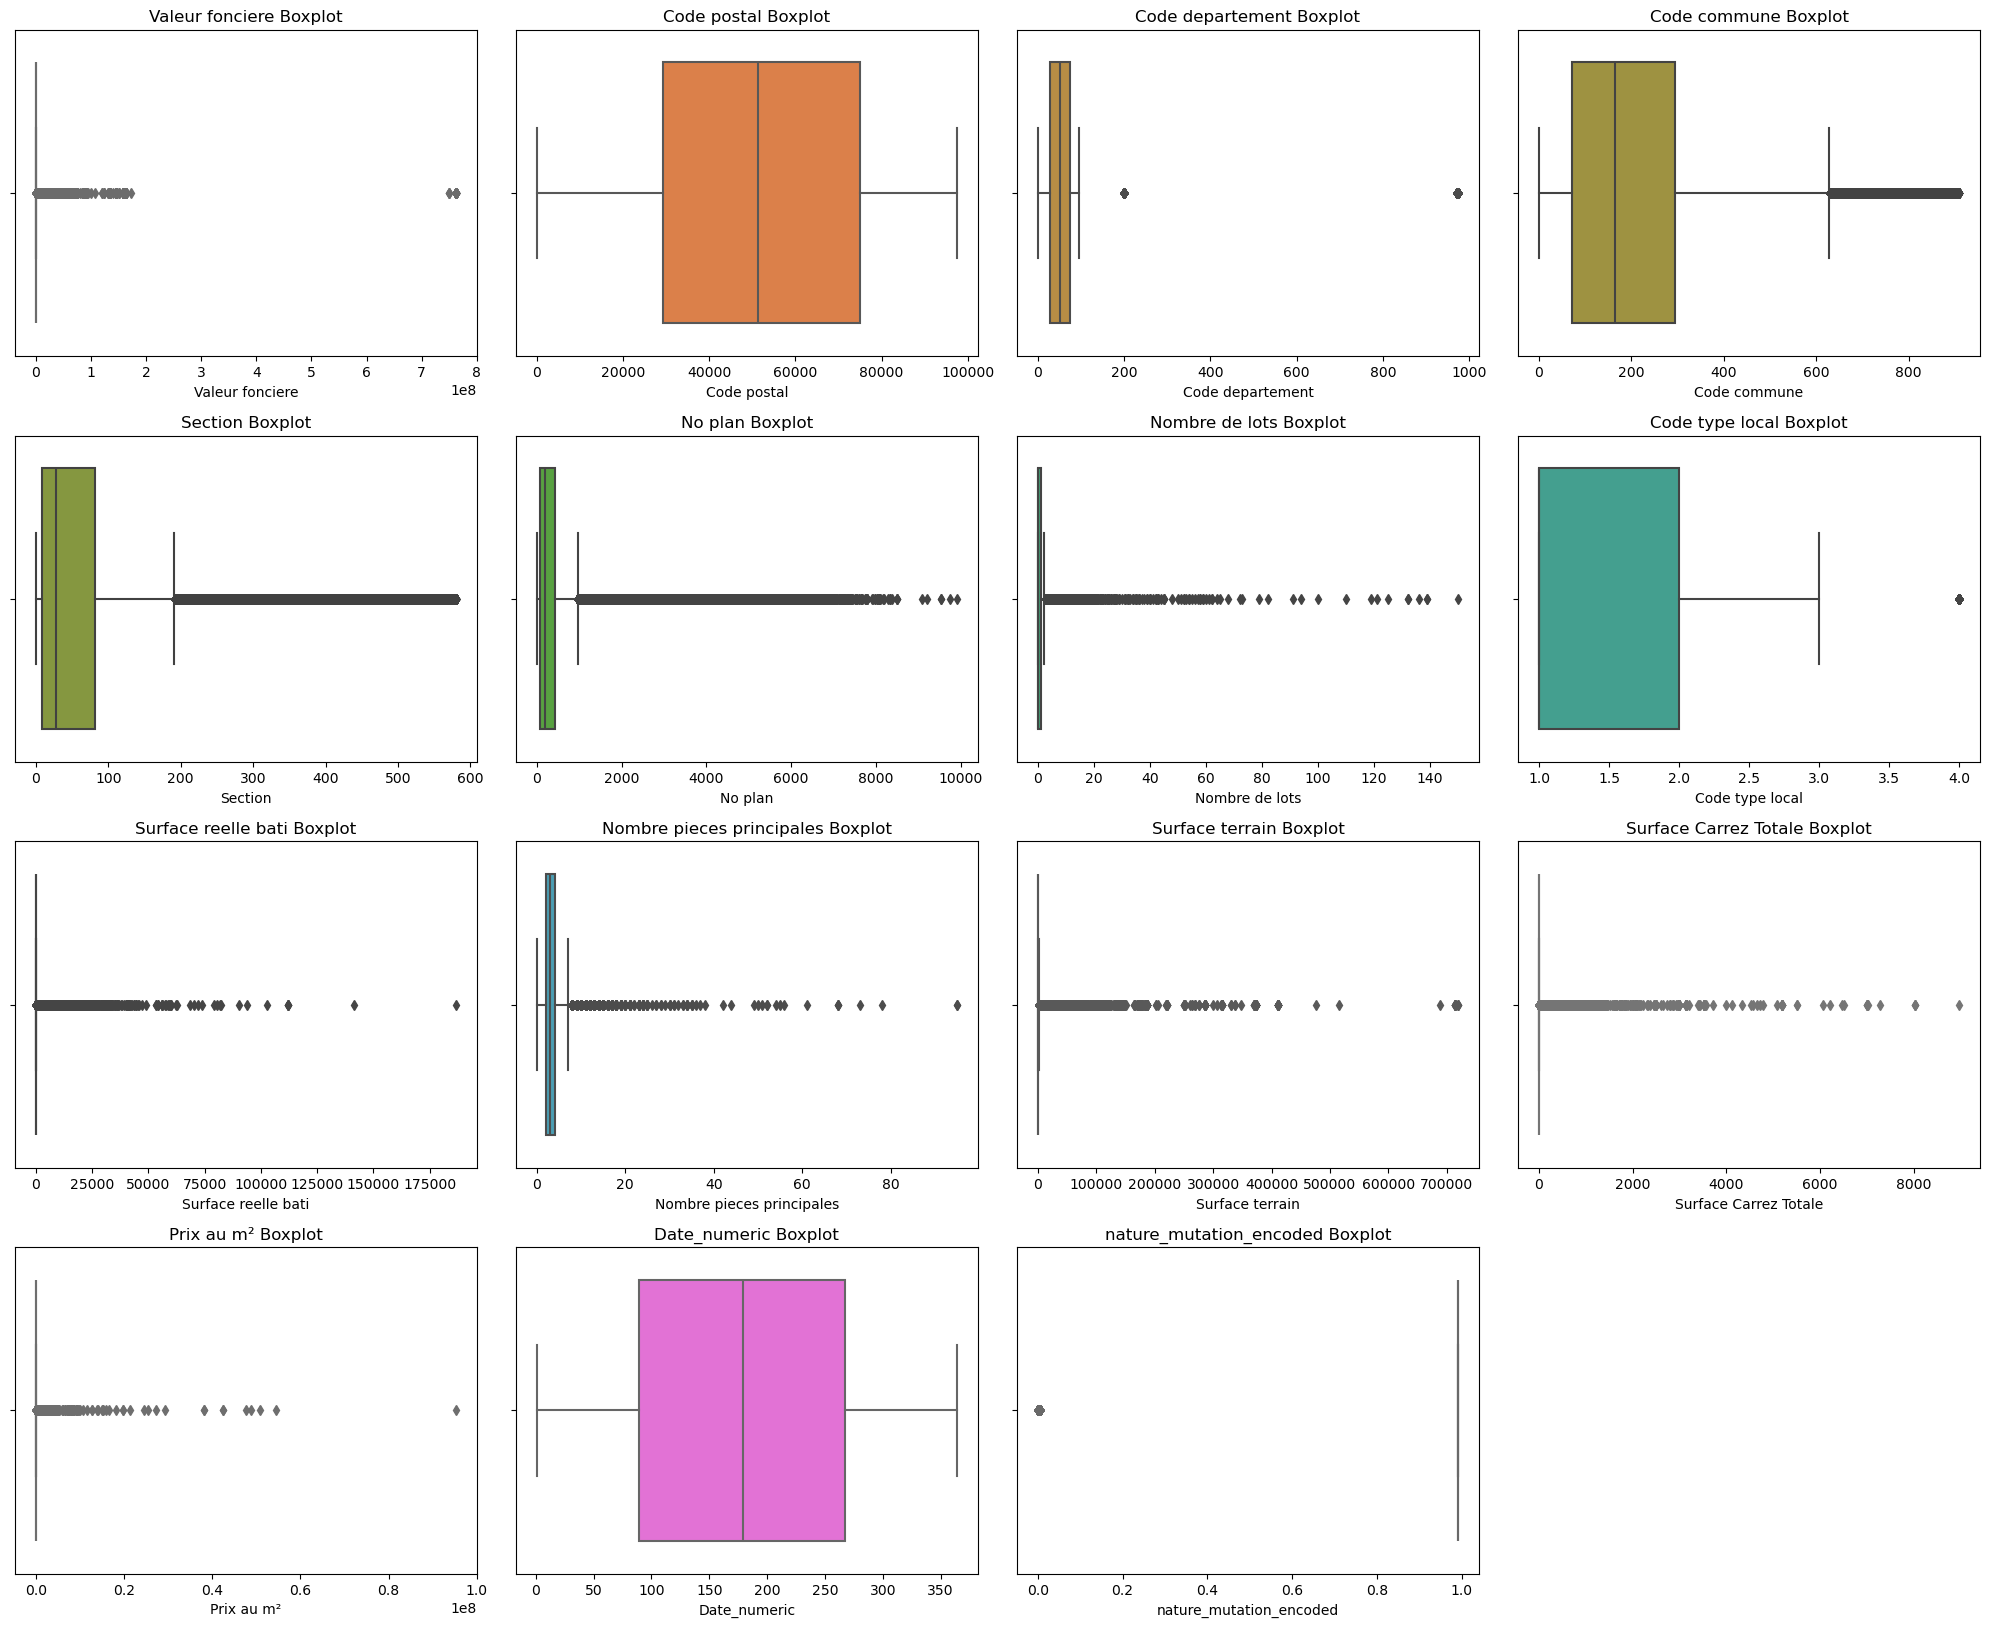

In [18]:
colors = sns.color_palette("husl", len(df_cleaned_2023.columns))

num_columns = len(df_cleaned_2023.columns)
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_cleaned_2023.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=df_cleaned_2023[col], color=colors[i % len(colors)])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


In [19]:
#d'après nos graphiques on oberve des valeurs aberrantes sur les colonnes 'Valeur fonciere', 'Prix au m²', 'Surface reelle bati', 'Surface terrain'
#on supprime ces valeurs aberrantes à l'aide d' une requete boolleenne

df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Valeur fonciere']<20000000]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Prix au m²']<30000]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Surface reelle bati']<30000]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Surface terrain']<100000]

### COMPARAISONS DE GRANDES VILLES

#### PARIS ET NICE

C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

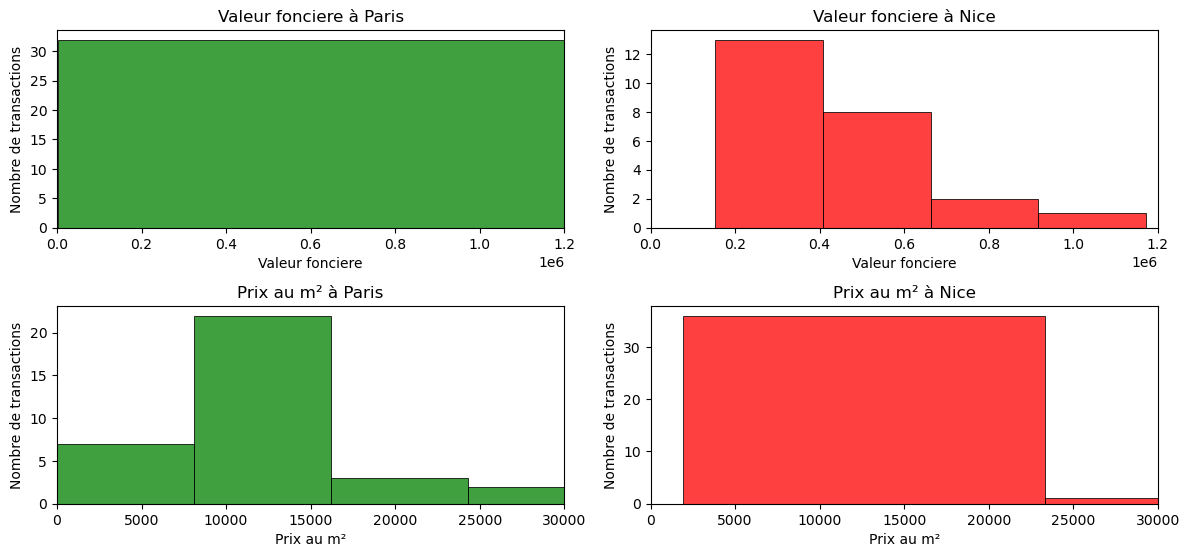

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['green', 'red']


columns_to_visualize = ['Valeur fonciere', "Prix au m²"]

plt.figure(figsize=(12, 8))


for col in columns_to_visualize:
    for dept in [75, 6]:
        plt.subplot(3, 2, columns_to_visualize.index(col) * 2 + [1, 2][dept == 6]) 
        sample_data_dept = df_2023_visu.sample(n=1000)
        sns.histplot(sample_data_dept[sample_data_dept['Code departement'] == dept][col], bins=50, color=colors[dept == 6])
        plt.xlabel(col)
        plt.ylabel('Nombre de transactions')
        plt.title(f'{col} à {"Nice" if dept == 6 else "Paris"}')
        plt.xlim(0, 1200000 if col == 'Valeur fonciere' else (300 if col == 'Surface reelle bati' else 30000))

plt.tight_layout()
plt.show()


#### PARIS ET LYON

C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

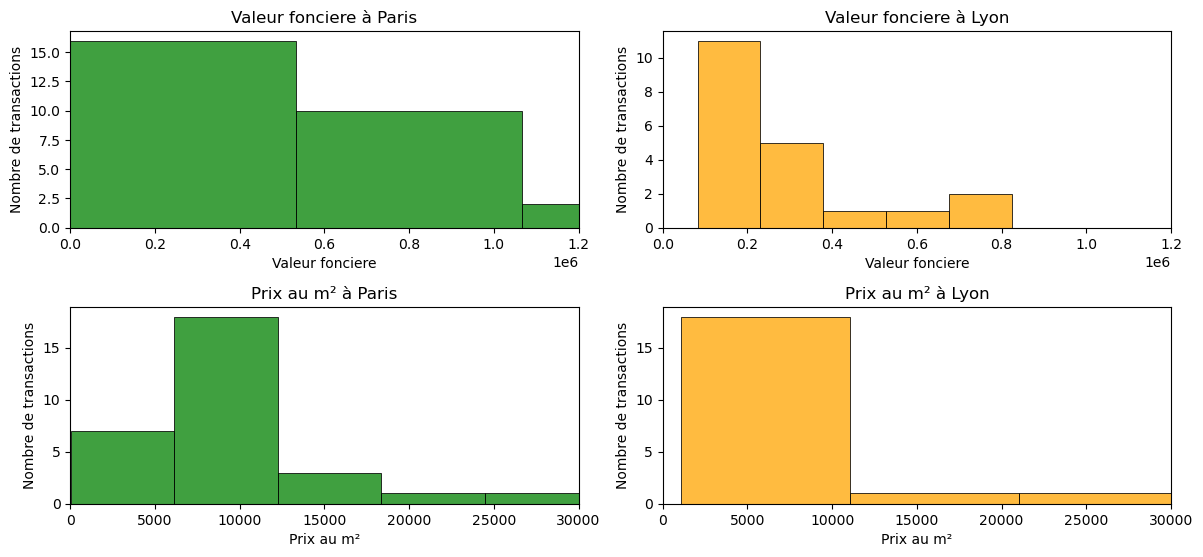

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['green', 'orange']

# Colonnes à visualiser
columns_to_visualize = ['Valeur fonciere', "Prix au m²"]

plt.figure(figsize=(12, 8))


for col in columns_to_visualize:
    for dept in [75, 69]:
        plt.subplot(3, 2, columns_to_visualize.index(col) * 2 + [1, 2][dept == 69])  
        sample_data_dept = df_2023_visu.sample(n=1000)
        sns.histplot(sample_data_dept[sample_data_dept['Code departement'] == dept][col], bins=50, color=colors[dept == 69])
        plt.xlabel(col)
        plt.ylabel('Nombre de transactions')
        plt.title(f'{col} à {"Lyon" if dept == 69 else "Paris"}')
        plt.xlim(0, 1200000 if col == 'Valeur fonciere' else (300 if col == 'Surface reelle bati' else 30000))

plt.tight_layout()
plt.show()


#### PARIS ET MARSEILLE

C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

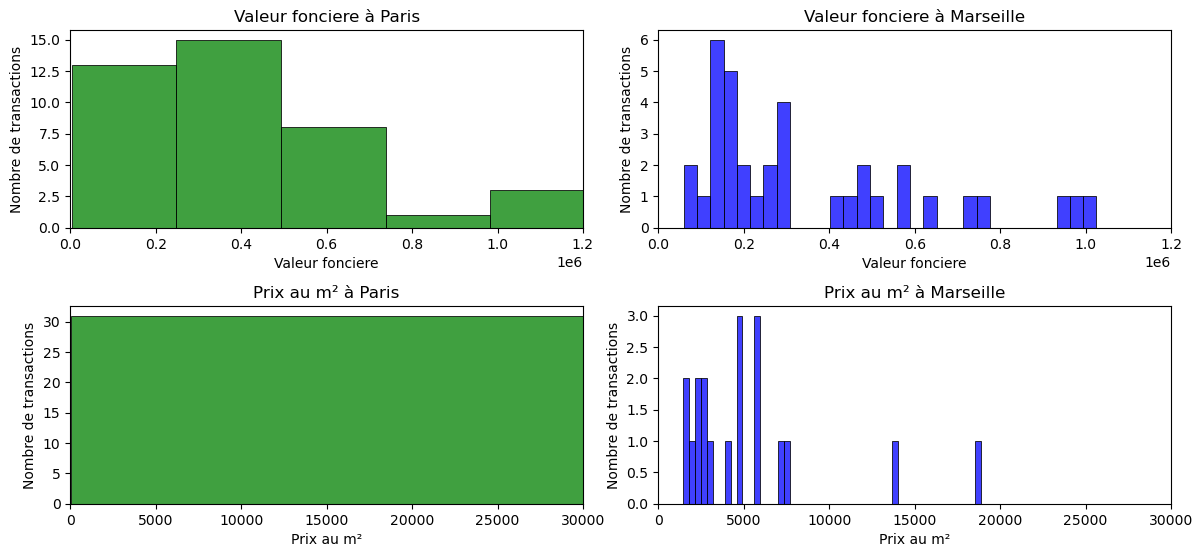

In [26]:


colors = ['green', 'blue']

# Colonnes à visualiser
columns_to_visualize = ['Valeur fonciere', "Prix au m²"]

plt.figure(figsize=(12, 8))

# Boucle sur chaque variable
for col in columns_to_visualize:
    # Sous-tracés pour Paris et Marseille
    for dept in [75, 13]:
        plt.subplot(3, 2, columns_to_visualize.index(col)*2 + [1, 2][dept == 13])  # Pour aligner Paris et Marseille côte à côte
        sample_data_dept = df_2023_visu.sample(n=1000)
        sns.histplot(sample_data_dept[sample_data_dept['Code departement']== dept][col], bins=50, color=colors[dept == 13])
        plt.xlabel(col)
        plt.ylabel('Nombre de transactions')
        plt.title(f'{col} à {"Marseille" if dept == 13 else "Paris"}')
        plt.xlim(0, 1200000 if col == 'Valeur fonciere' else (300 if col == 'Surface reelle bati' else 30000))

plt.tight_layout()
plt.show()


### PRIX PAR SURFACE


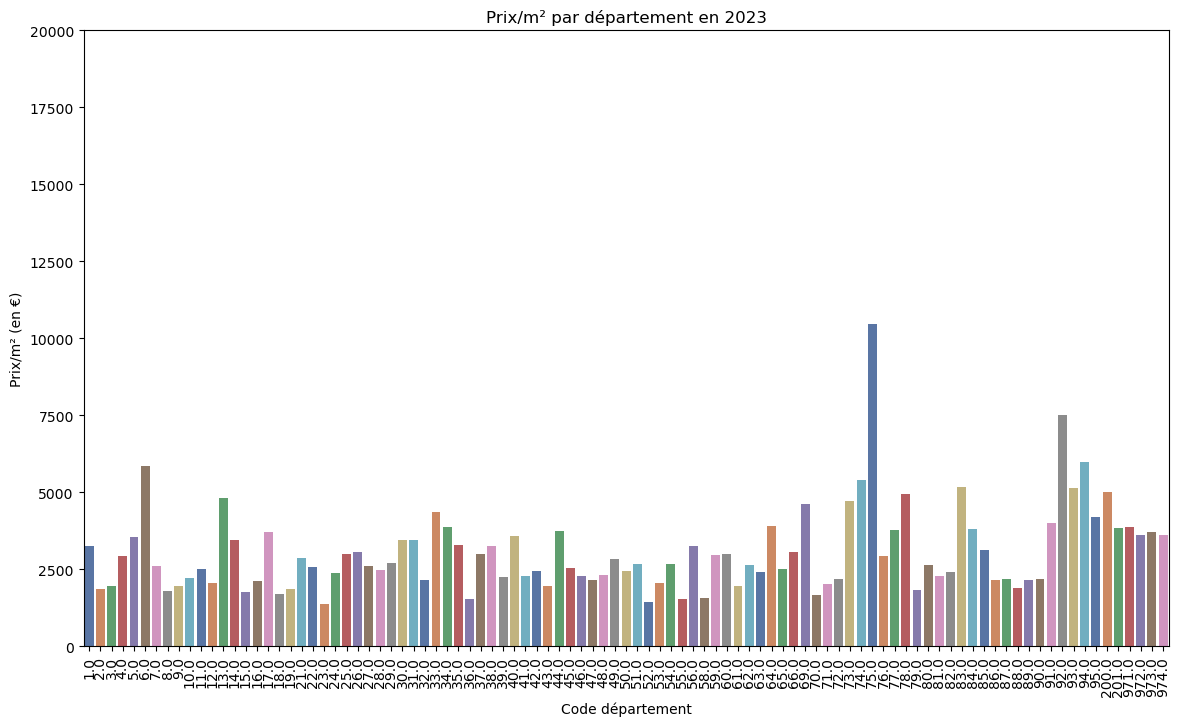

In [27]:
# Calculer le prix moyen par m² par département
prixparsurface = df_cleaned_2023.groupby('Code departement')['Prix au m²'].mean().reset_index()

#  graphique à barres
plt.figure(figsize=(14, 8))
sns.barplot(x='Code departement', y='Prix au m²', data=prixparsurface, palette='deep')
plt.title('Prix/m² par département en 2023')
plt.xlabel('Code département')
plt.ylabel('Prix/m² (en €)')
plt.ylim(0,20000)
plt.xticks(rotation=90)
plt.show()


### DISPERSION DU PRIX AU M² EN FONCTION DE LA VALEURE FONCIERE (PARIS,MARSEILLE,LYON)

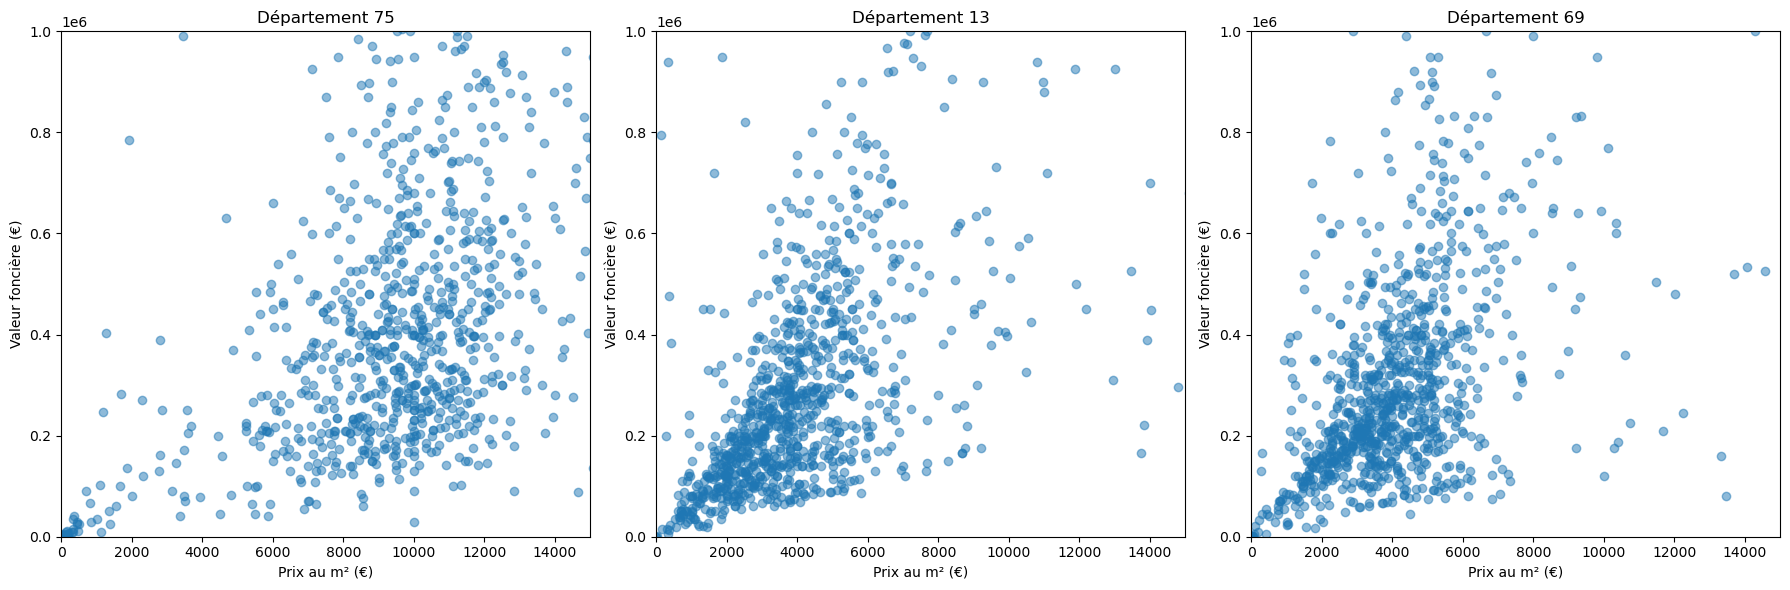

In [28]:
plt.figure(figsize=(18, 6))

for i, dept in enumerate([75,13,69]):
    sample_df = df_cleaned_2023[df_cleaned_2023['Code departement'] == dept].sample(n=1000)

    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_df['Prix au m²'], sample_df['Valeur fonciere'], alpha=0.5)
    plt.title(f'Département {dept}')
    plt.xlabel('Prix au m² (€)')
    plt.ylabel('Valeur foncière (€)')
    plt.xlim(0, 15000)
    plt.ylim(0, 1000000)

plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------

### NORMALISATION

In [29]:
scaler = StandardScaler()
df_norm_2023 = scaler.fit_transform(df_cleaned_2023)
df_norm_2023

array([[  1.60747507,  -1.78888775,  -0.58654372, ...,   0.26712338,
         -1.70752004,   0.09030001],
       [ -0.28025808,  -1.79541146,  -0.58654372, ...,  -0.35225298,
         -1.72697624,   0.09030001],
       [ -0.04002357,  -1.78272648,  -0.58654372, ...,   0.01330725,
         -1.70752004,   0.09030001],
       ...,
       [ -0.29712386,   0.8707897 ,   0.12616976, ...,   1.66796212,
         -1.29893997, -11.08189978],
       [  7.49198643,   0.87049975,   0.12616976, ...,   4.32056115,
          0.94825045, -11.08189978],
       [ -0.39122256,   0.8707897 ,   0.12616976, ...,   0.50939076,
          1.76541061,   0.09030001]])

### MATRICE DE CORRELATION

C:\Users\am91r\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


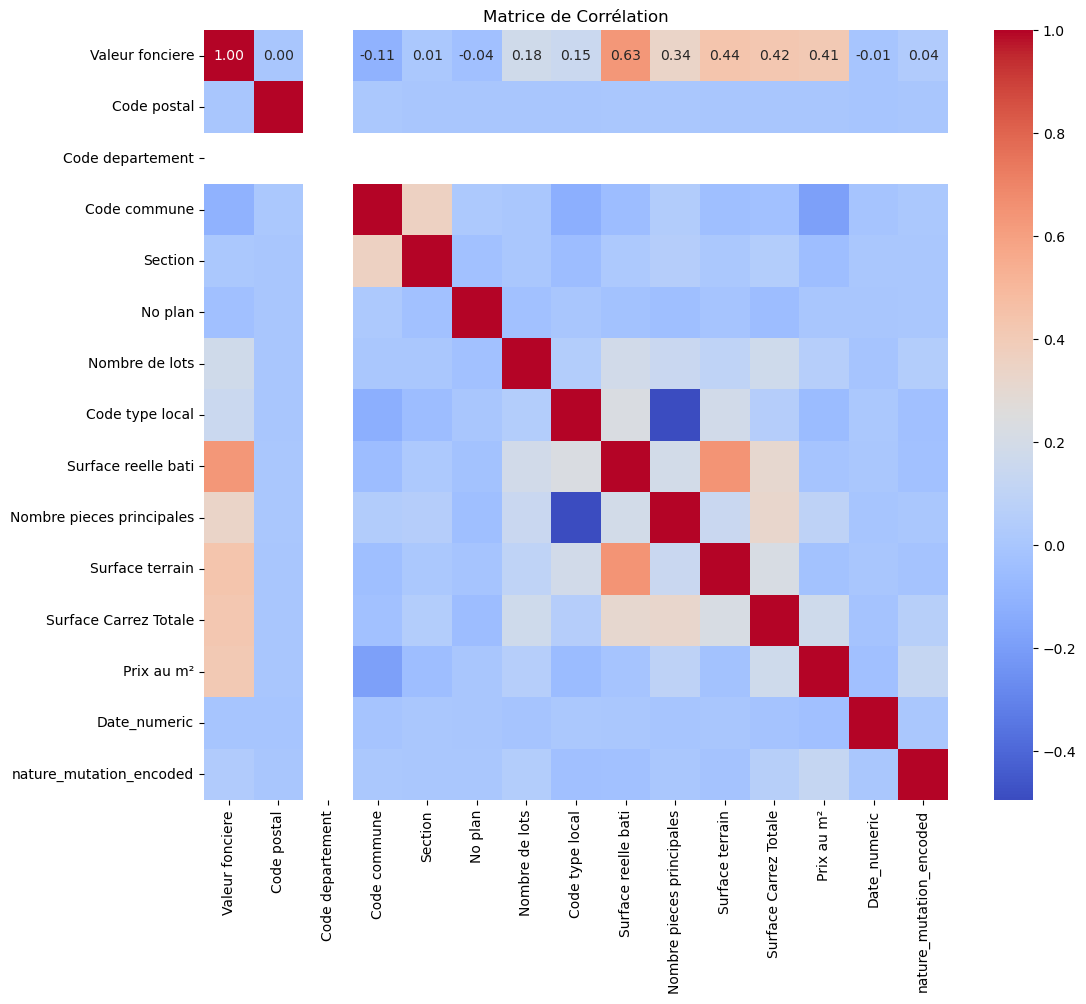

In [30]:
normalized_df = pd.DataFrame(df_norm_2023, columns=df_cleaned_2023.columns)
df_paris = df_cleaned_2023[df_cleaned_2023['Code departement'] == 75]
df_department = df_cleaned_2023[(df_cleaned_2023['Code departement'] == 75) & (df_cleaned_2023['Code type local'] == 2)]
correlation_matrix = df_paris.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

### APPRENTISSAGE NON-SUPERVISE (K-Means)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [32]:
# Sélectionner les colonnes pour le clustering

variables_for_clustering = ['Valeur fonciere', 'Surface reelle bati', 'Surface terrain', 'Prix au m²','Code departement', 'Nombre pieces principales', 'Code type local']
df_unsupervised = df_cleaned_2023[['Valeur fonciere', 'Surface reelle bati', 'Surface terrain', 'Prix au m²','Code departement', 'Nombre pieces principales', 'Code type local']]
df_unsupervised

,Valeur fonciere,Surface reelle bati,Surface terrain,Prix au m²,Code departement,Nombre pieces principales,Code type local
2,1070000.0,233.0,233.0,4592.274678,1.0,8.0,2.0
3,152200.0,64.0,988.0,2378.125000,1.0,3.0,1.0
4,269000.0,73.0,835.0,3684.931507,1.0,3.0,1.0
7,770000.0,136.0,921.0,5661.764706,1.0,7.0,1.0
14,85520.0,160.0,160.0,534.500000,1.0,5.0,1.0
...,...,...,...,...,...,...,...
3726993,145000.0,18.0,18.0,8055.555556,75.0,2.0,2.0
3726994,212000.0,26.0,26.0,8153.846154,75.0,1.0,2.0
3726995,144000.0,15.0,15.0,9600.000000,75.0,1.0,2.0
3726998,3931000.0,206.0,206.0,19082.524272,75.0,6.0,2.0


In [33]:
# Normaliser les données
scaler = StandardScaler()
df_unsupervised_scaled = scaler.fit_transform(df_unsupervised)

In [34]:
#entrainement du modèle kmeans avec différents nb de clusters pour trouver le nb optimal de clusters
elbow = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_unsupervised_scaled)
    elbow.append(kmeans.inertia_)

C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\clust

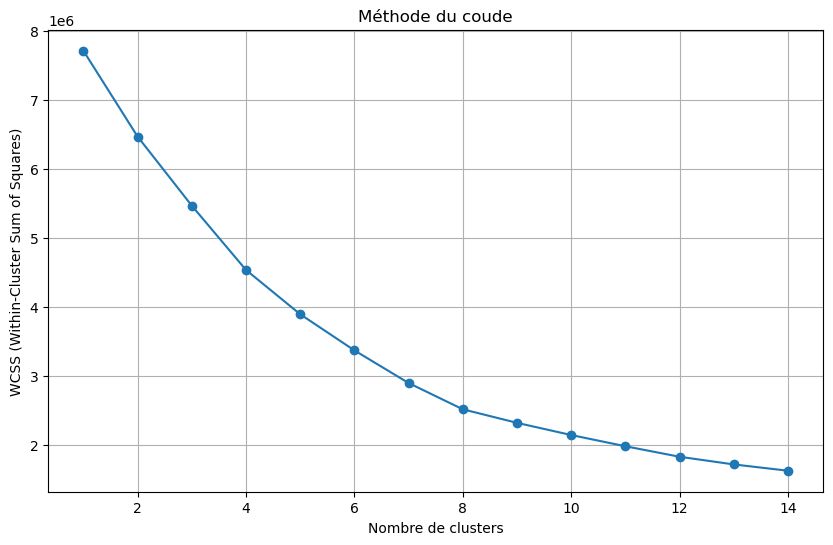

In [35]:
# Tracer la méthode du coude
plt.figure(figsize=(10, 6))

plt.plot(range(1, 15), elbow, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

ON OBSERVE QUE LE COUDE (NB DE CLUSTERS OPTIMAL) SE TROUVE A 6 CLUSTERS 

In [36]:
nbclustopti = 6

pca = PCA()
pca.fit(df_unsupervised_scaled)

explained_variance = pca.explained_variance_ratio_

n_components_optimal = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f'Nombre optimal de composantes: {n_components_optimal}')

pca_optimal = PCA(n_components=n_components_optimal)

principalComponents_optimal = pca_optimal.fit_transform(df_unsupervised_scaled)

Nombre optimal de composantes: 6


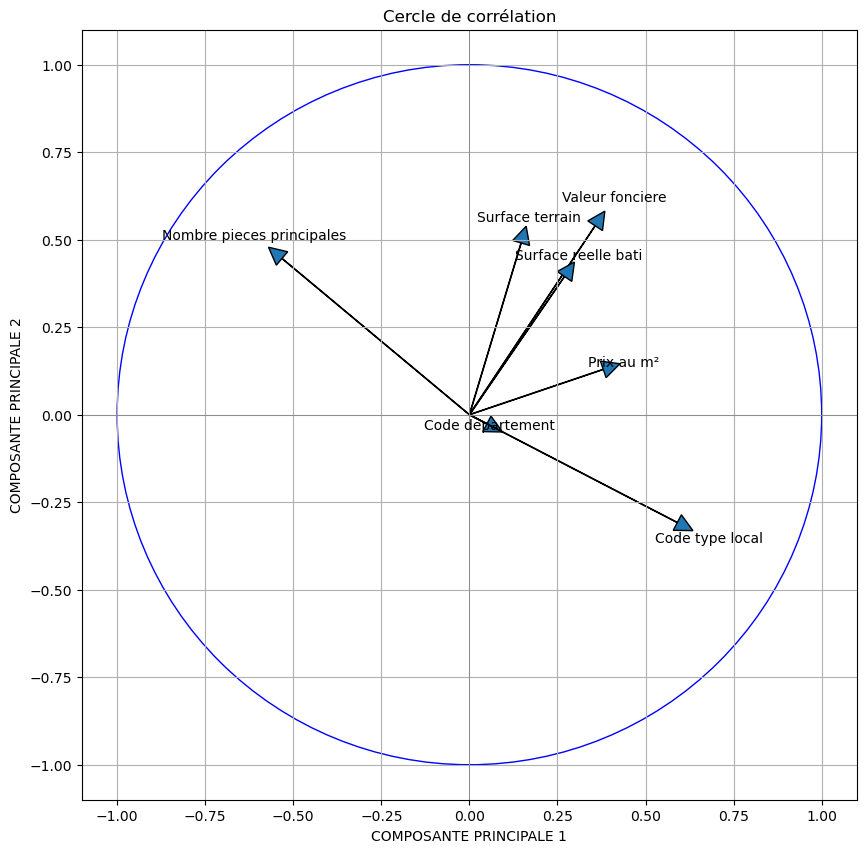

In [37]:
# Calcul des composantes principales
pcs = pca_optimal.components_

# Cercles de corrélation
def correlation_circle(pcs, labels):
    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(len(labels)):
        plt.arrow(0, 0, pcs[0, i], pcs[1, i], head_width=0.05, head_length=0.05)
        plt.text(pcs[0, i] * 1.15, pcs[1, i] * 1.15, labels[i], color='black', ha='center', va='center')

    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    ax.add_artist(circle)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('COMPOSANTE PRINCIPALE 1')
    plt.ylabel('COMPOSANTE PRINCIPALE 2')
    plt.grid(True)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.title('Cercle de corrélation')
    plt.show()

# Noms des caractéristiques
labels = variables_for_clustering

# Tracer le cercle de corrélation
correlation_circle(pcs, labels)

In [38]:
kmeans = KMeans(n_clusters=nbclustopti, random_state=42)
clusters = kmeans.fit_predict(principalComponents_optimal)

df_cleaned_2023['Cluster'] = clusters


cluster_summary = df_cleaned_2023.groupby('Cluster').agg(['mean', 'median', 'std'])
print("Statistiques descriptives par cluster:")

cluster_summary

C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Statistiques descriptives par cluster:


Valeur fonciere                            Code postal           \
                   mean     median           std          mean   median   
Cluster                                                                   
0          1.789926e+05   151000.0  1.213016e+05  50919.956026  51100.0   
1          3.305962e+05   185000.0  4.520899e+05  49240.026405  49100.0   
2          2.627773e+05   216000.0  1.987768e+05  48965.443988  48000.0   
3          9.576198e+05   675662.0  9.765582e+05  60057.559963  75005.0   
4          3.547605e+06  1497500.0  4.540278e+06  50032.794885  50195.0   
5          2.625925e+05   176400.0  3.371877e+05  97310.284101  97311.0   

                      Code departement                   Code commune  ...  \
                  std             mean median        std         mean  ...   
Cluster                                                                ...   
0        28704.086082        51.889694   53.0  31.131675   195.018978  ...   
1        26913.486474        49.888471   49.0  28.962437   208.447356  ...   
2        25782.332784        49.098214   49.0  26.918080   225.791296  ...   
3        27613.229089        61.011290   75.0  29.667113   160.096851  ...   
4        26827.677684        59.172616   50.0  94.391577   225.236548  ...   
5          127.618450       972.775993  973.0   1.239094    14.348498  ...   

        Surface Carrez Totale    Prix au m²                             \
                          std          mean        median          std   
Cluster                                                                  
0                   47.644546   3567.404020   3153.846154  2129.447366   
1                   98.584807   2677.164654   1769.230769  2687.214780   
2                   28.304837   2446.458782   2156.626506  1452.336986   
3                   70.495247  14349.440781  12655.172414  5078.288566   
4                  223.243821   3838.797993   1109.464601  6152.095371   
5                   26.264909   3666.767099   2815.271318  3598.676117   

        Date_numeric                    nature_mutation_encoded           \
                mean median         std                    mean   median   
Cluster                                                                    
0         177.627754  177.0  102.846067                0.980678  0.99124   
1         180.707099  178.0  104.780395                0.974491  0.99124   
2         181.257433  180.0  102.250358                0.986705  0.99124   
3         176.772322  176.0  104.013097                0.984138  0.99124   
4         188.917954  186.0  110.156956                0.977025  0.99124   
5         177.621148  178.0  100.502445                0.980678  0.99124   

                   
              std  
Cluster            
0        0.101610  
1        0.127575  
2        0.066815  
3        0.083471  
4        0.117675  
5        0.101649  

[6 rows x 45 columns]

### VISUALISATION DES CARACTERISTIQUES DES 6 CLUSTERS 

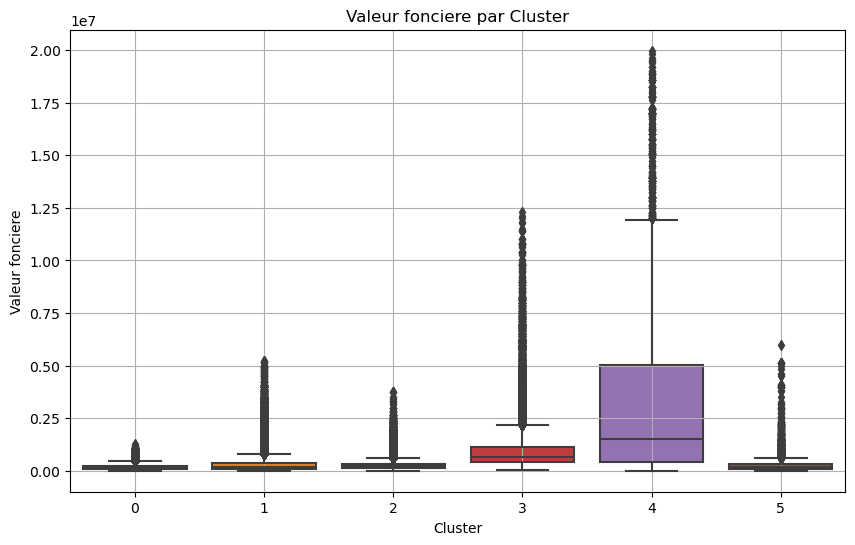

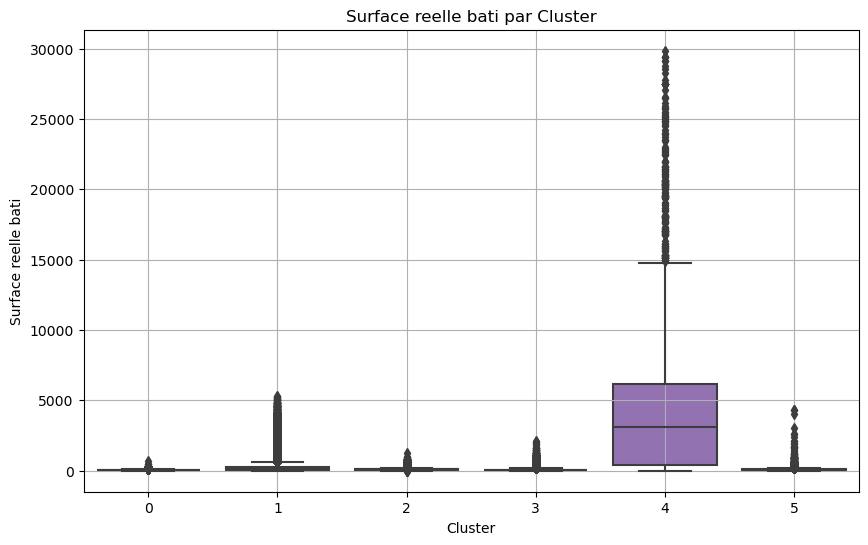

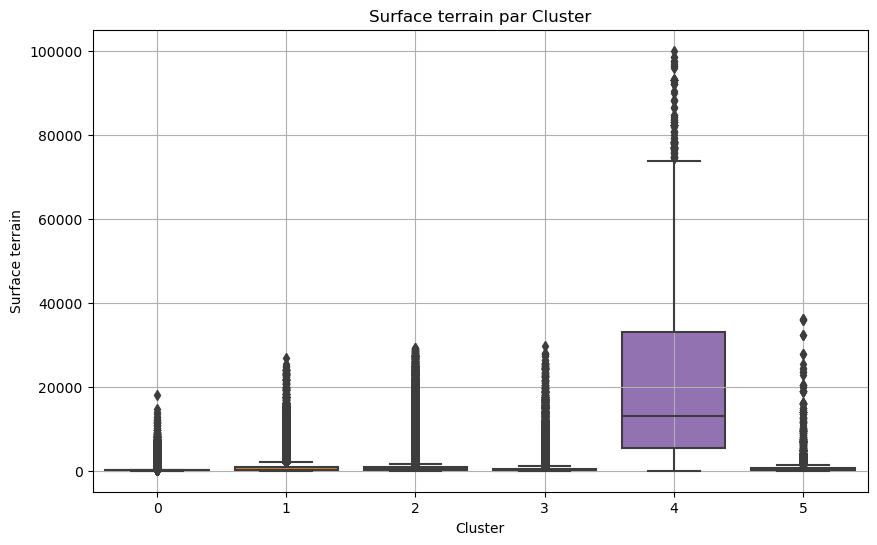

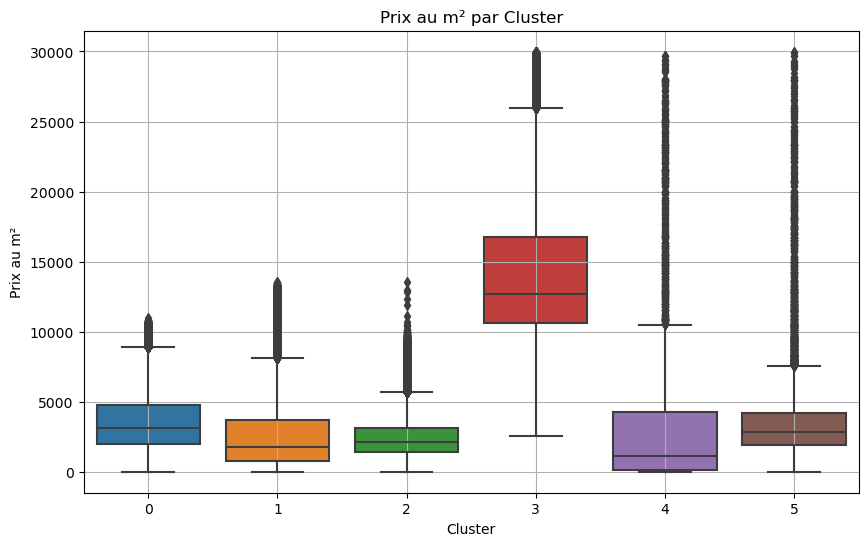

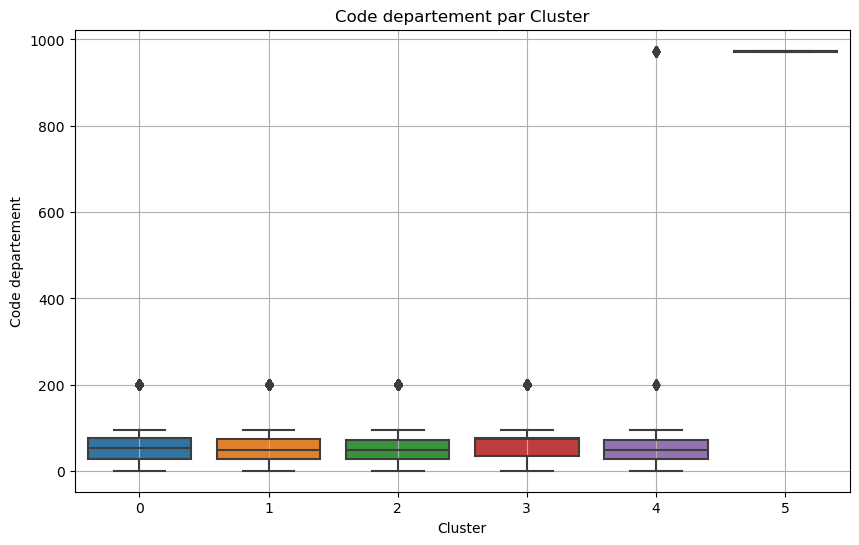

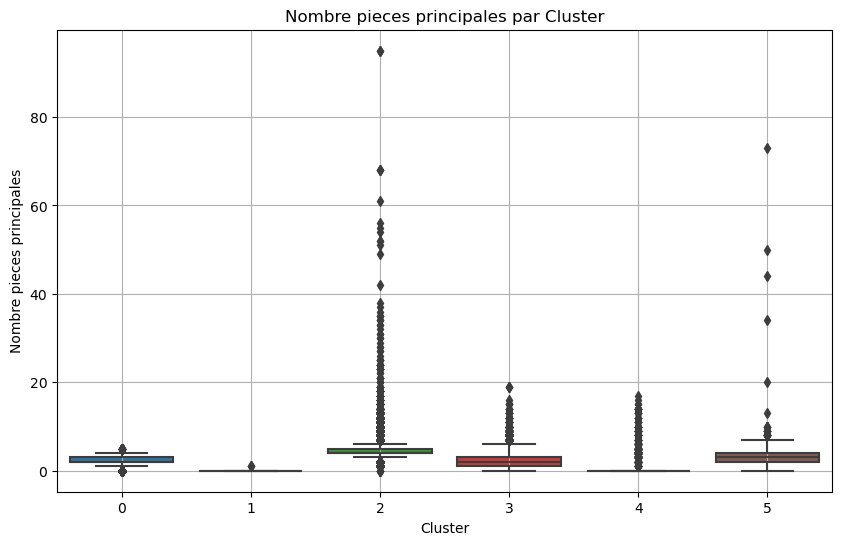

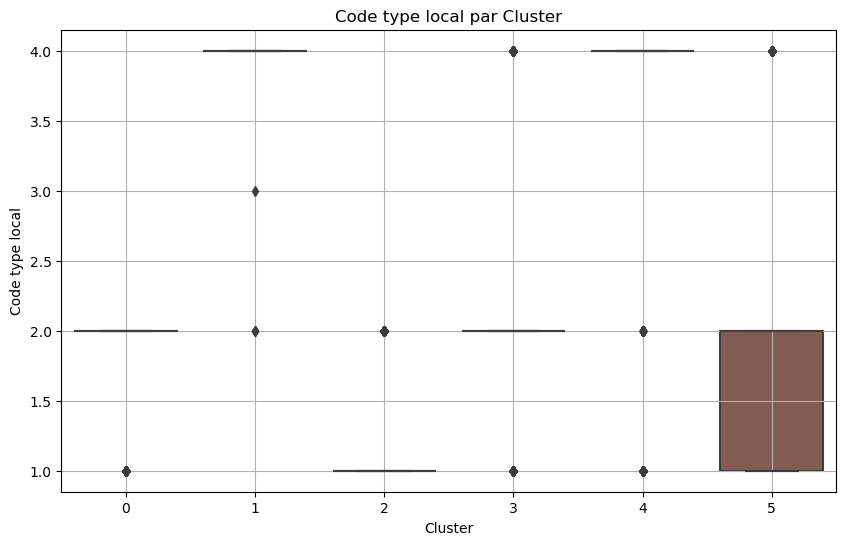

In [39]:
features = ['Valeur fonciere', 'Surface reelle bati', 'Surface terrain', 'Prix au m²','Code departement', 'Nombre pieces principales', 'Code type local']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_cleaned_2023)
    plt.title(f'{feature} par Cluster')
    plt.grid(True)
    plt.show()

In [40]:
# Comparer les clusters aux données initiales
initial_summary = df_cleaned_2023[features].mean()
print("Moyennes des caractéristiques initiales:")
print(initial_summary)

Moyennes des caractéristiques initiales:
Valeur fonciere              288459.124973
Surface reelle bati             112.522607
Surface terrain                 607.518625
Prix au m²                     3637.360698
Code departement                 61.899978
Nombre pieces principales         3.196883
Code type local                   1.639979
dtype: float64


In [41]:
for cluster in sorted(df_cleaned_2023['Cluster'].unique()):
    cluster_data = df_cleaned_2023[df_cleaned_2023['Cluster'] == cluster]
    cluster_mean = cluster_data[features].mean()
    print(f"Moyennes des caractéristiques pour le Cluster {cluster}:")
    print(cluster_mean)
    print()

Moyennes des caractéristiques pour le Cluster 0:
Valeur fonciere              178992.595605
Surface reelle bati              53.749981
Surface terrain                 152.971073
Prix au m²                     3567.404020
Code departement                 51.889694
Nombre pieces principales         2.354026
Code type local                   1.860563
dtype: float64

Moyennes des caractéristiques pour le Cluster 1:
Valeur fonciere              330596.183162
Surface reelle bati             292.638471
Surface terrain                 917.706550
Prix au m²                     2677.164654
Code departement                 49.888471
Nombre pieces principales         0.000038
Code type local                   3.999910
dtype: float64

Moyennes des caractéristiques pour le Cluster 2:
Valeur fonciere              262777.266808
Surface reelle bati             108.085136
Surface terrain                 782.292818
Prix au m²                     2446.458782
Code departement                 49.098214
Nomb

### APPRENTISSAGE SUPERVISE 

In [42]:
df_cleaned_2023['Code type local'].unique()
df_cleaned_2023.head(100)

,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²,Date_numeric,nature_mutation_encoded,Cluster
2,1070000.0,1630.0,1.0,354,32.0,336,1,2.0,233.0,8.0,233.0,0.00,4592.274678,4,0.99124,2
3,152200.0,1450.0,1.0,404,82.0,2317,0,1.0,64.0,3.0,988.0,0.00,2378.125000,2,0.99124,2
4,269000.0,1800.0,1.0,361,28.0,2405,0,1.0,73.0,3.0,835.0,0.00,3684.931507,4,0.99124,2
7,770000.0,1210.0,1.0,281,5.0,41,0,1.0,136.0,7.0,921.0,0.00,5661.764706,2,0.99124,2
14,85520.0,1340.0,1.0,24,10.0,127,0,1.0,160.0,5.0,160.0,0.00,534.500000,5,0.99124,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,900000.0,1220.0,1.0,143,12.0,551,4,2.0,210.0,7.0,210.0,204.30,4285.714286,5,0.99124,2
329,182000.0,1340.0,1.0,196,82.0,4,0,1.0,119.0,5.0,850.0,0.00,1529.411765,9,0.99124,2
336,200000.0,1500.0,1.0,4,9.0,283,0,1.0,57.0,2.0,728.0,0.00,3508.771930,9,0.99124,0
354,50400.0,1710.0,1.0,419,6.0,66,1,4.0,21.0,0.0,21.0,22.03,2400.000000,11,0.99124,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [44]:
df_departement = df_cleaned_2023[(df_cleaned_2023['Code departement'] == 13) & (df_cleaned_2023['Code type local'] == 2)]

moyenne_prix_m2 = df_departement['Prix au m²'].mean()
moyenne_prix_m2

features = ['Code postal', 'Nombre de lots', 'Surface reelle bati',
            'Surface terrain','Surface Carrez Totale', 'Prix au m²','nature_mutation_encoded']

target = 'Valeur fonciere'

X = df_departement[features]
y = df_departement[target]
X = X[X['Prix au m²']<30000]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
# pr&dictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [46]:
# évaluation du modèle
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
#mean_abs = mean_absolute_error()


print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')
print(f'mean_squared_error: {mse}')

Train R^2: 0.817859728418909
Test R^2: 0.8138790644452774
mean_squared_error: 8538476782.317373


### PREDICTION POUR LE MODELE SUPERVISE

In [47]:
new_data = np.array([[13001, 1, 170, 10, 0, moyenne_prix_m2, 1]])
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)

print(f'Prix prédit pour l\'appartement: {round(predicted_price[0],2)} euros')

Prix prédit pour l'appartement: 801664.96 euros


C:\Users\am91r\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
